<a href="https://colab.research.google.com/github/Blackpanther-007/CS229/blob/main/lect_2/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Synthetic data

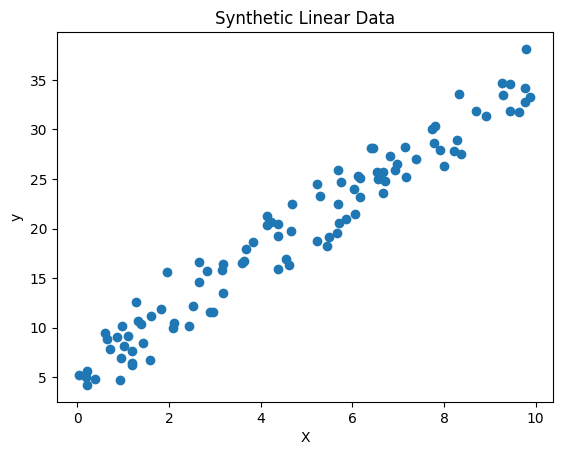

In [2]:
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature: x
y = 3 * X + 5 + np.random.randn(100, 1) * 2
y.shape
plt.scatter(X, y)
plt.title("Synthetic Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [3]:
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros((2, 1))

#### Functions

In [4]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


In [5]:
def gradient_descent(X, y, theta, alpha, num_iters, tolerance=1e-6):
    m = y.shape[0]
    cost_history = []
    prev_cost = float('inf')

    for i in range(num_iters):
        predictions = X @ theta
        gradient = (1 / m) * (X.T @ (predictions - y))
        theta = theta - alpha * gradient

        current_cost = compute_cost(X, y, theta)
        cost_history.append(current_cost)

        if abs(prev_cost - current_cost) < tolerance:
            print(f"Early stopping at iteration {i}")
            break

        prev_cost = current_cost

    return theta, cost_history

### test on synthetic data

In [6]:
alpha = 0.01
num_iters = 1000
theta_final, cost_history = gradient_descent(X_bias, y, theta, alpha, num_iters)

In [7]:
print("Final theta:", theta_final.ravel())

Final theta: [5.10097212 3.04078232]


In [8]:
y_predict = X_bias @ theta_final

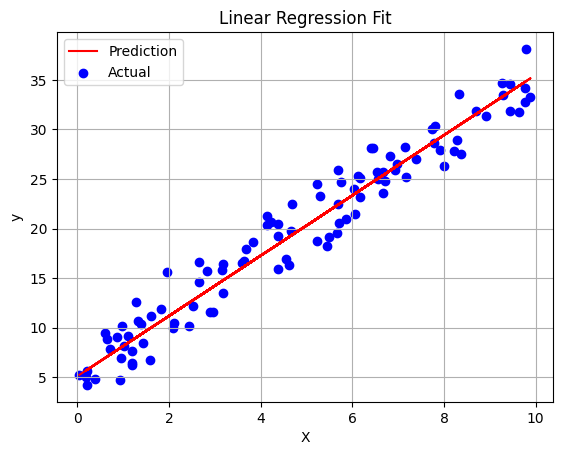

In [9]:

plt.plot(X.flatten(), y_predict.flatten(), 'r-', label='Prediction')
plt.scatter(X.flatten(), y.flatten(), color='blue', label='Actual')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

### In Pytorch

In [10]:
import torch.nn as nn
import torch 
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [11]:
torch.manual_seed(0)

x = torch.linspace(0, 10, 100).view(-1, 1)  
y = 2 * x + 3 + torch.randn_like(x) 

x_numpy = x.numpy()
y_numpy = y.numpy()


In [12]:
class LinearReg(nn.Module):
    def __init__(self):
        super(LinearReg, self).__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        return self.linear(x)

In [14]:
model = LinearReg()
criterion = nn.MSELoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

In [16]:
epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = model(x)

    loss = criterion(y_pred, y)

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    losses.append(loss.item())

    if epoch%100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/1000], Loss: 19.7736
Epoch [101/1000], Loss: 1.6147
Epoch [201/1000], Loss: 1.2584
Epoch [301/1000], Loss: 1.1267
Epoch [401/1000], Loss: 1.0780
Epoch [501/1000], Loss: 1.0600
Epoch [601/1000], Loss: 1.0534
Epoch [701/1000], Loss: 1.0509
Epoch [801/1000], Loss: 1.0500
Epoch [901/1000], Loss: 1.0497


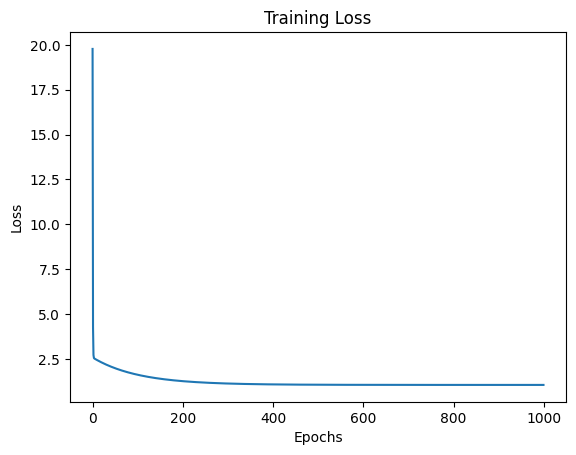

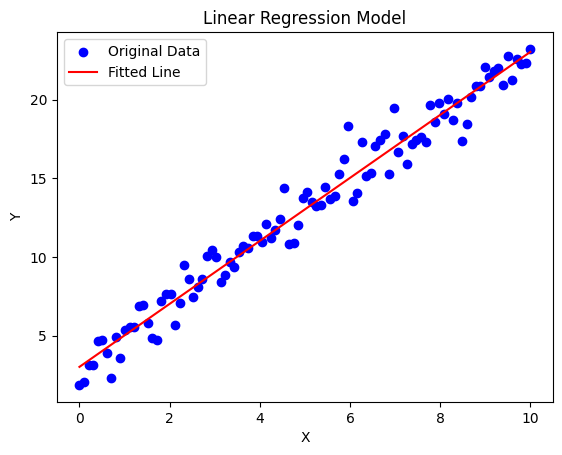

In [ ]:
# Plotting the loss curve
plt.plot(range(epochs), losses, label='Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

with torch.no_grad():
    predicted = model(x)

plt.scatter(x_numpy, y_numpy, color='blue', label='Original Data')
plt.plot(x_numpy, predicted.numpy(), color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()
